### Problem Statement 1: Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:

In [61]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [62]:
# Loading Libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Loading the dataset into frame

country_df = pd.read_csv("Assignment 5 Datasets\Country-data.csv")

In [64]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [65]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

1. Create a seperate DataFrame with only numeric data by remove the "country" column

In [66]:
new_df = country_df.drop(columns=['country'])

In [67]:
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


2. Scale the data using the Standard Scaler to create a scaled DataFrame

In [68]:
# Importing Standard scaler from sklearn preprocessing

from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
_df = sc.fit_transform(new_df)

In [70]:
# Adding the columns or labels and creating a dataframe with the scaled data

scaled_df = pd.DataFrame(_df, columns=new_df.columns)

In [71]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


3. Plotting dendograms with the complete linkage method

In [72]:
# Importing the hierarchy algo from scipy.cluster

import scipy.cluster.hierarchy as shc

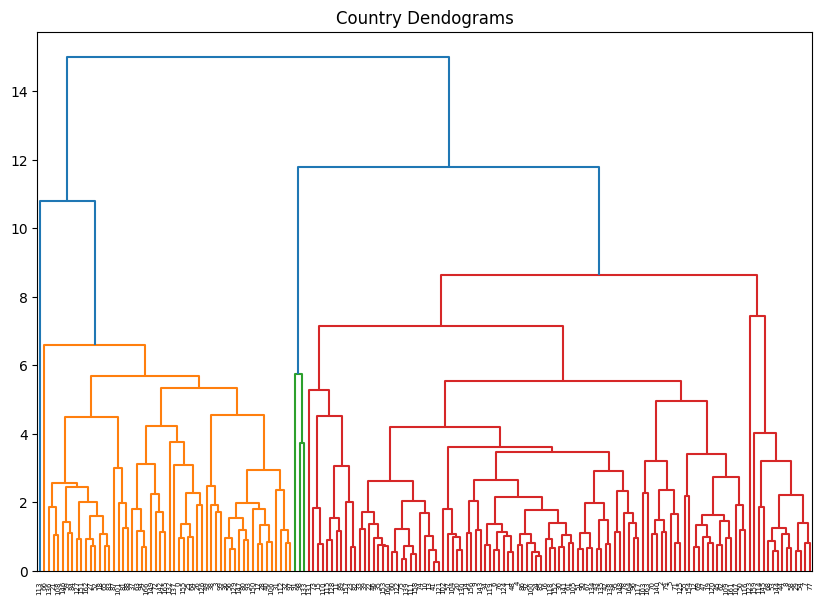

In [73]:
# Ploting the dendogram of the country using the complete

plt.figure(figsize=(10, 7))    
plt.title("Country Dendograms")  
dend = shc.dendrogram(shc.linkage(scaled_df, method='complete'))  

4. Creating cluster labels using cut tree

In [74]:
# Perform hierarchical clustering

high_cluster = shc.linkage(scaled_df, method="ward")


In [75]:
# Cut the dendrogram to form clusters

clusters = shc.cut_tree(high_cluster, n_clusters=5)

In [76]:
# Assign labels to data points

cluster_labels = clusters.flatten()

In [77]:
cluster_labels

array([0, 1, 2, 2, 1, 2, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 1, 0, 1, 2, 1, 1,
       2, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1,
       3, 2, 2, 2, 1, 2, 2, 1, 1, 3, 3, 2, 0, 1, 3, 2, 3, 1, 2, 0, 0, 1,
       0, 1, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 1, 1,
       1, 3, 1, 4, 1, 0, 0, 1, 1, 0, 4, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2,
       3, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2, 1, 3, 3, 1, 2, 0, 1, 3, 0, 1, 1,
       0, 4, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 3, 3, 3, 2, 2, 1, 2, 1, 2, 0])

In [78]:
# Adding the cluster_labels to the scaled data frame

scaled_df["Hierarchical_cluster_labels"] = cluster_labels


In [79]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


5. Perform the 4-Component PCA on DataFrame

In [80]:
# Importing the PCA algorithm 

from sklearn.decomposition import PCA

In [81]:
pca_df = scaled_df.drop(columns=['Hierarchical_cluster_labels'])

In [82]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(pca_df)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['PC1', 'PC2', 'PC3', 'PC4'])


In [83]:
principalDf.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [84]:
principalDf["Hierarchical_cluster_labels"] = cluster_labels

In [85]:
principalDf.head()

,PC1,PC2,PC3,PC4,Hierarchical_cluster_labels
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,1
2,-0.285225,-0.455174,1.221505,-0.868115,2
3,-2.932423,1.695555,1.525044,0.839625,2
4,1.033576,0.136659,-0.225721,-0.847063,1


6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

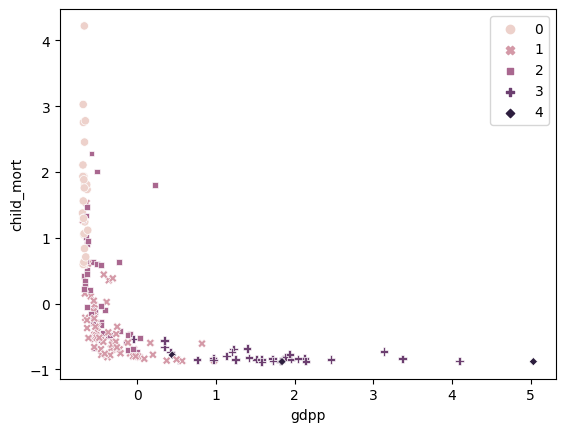

In [86]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_cluster_labels', data=principalDf)
# plt.title('How Low GDP Rate Corresponds to the Child Mortality Rate')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

sns.scatterplot(x='gdpp',y='child_mort',data=scaled_df,hue='Hierarchical_cluster_labels',style='Hierarchical_cluster_labels')
plt.legend(bbox_to_anchor=(1,1))

### Problem Statement 2: Write a Python program that reads the “Credit Card Customer Data.csv” (provided on LMS) The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.

In [87]:
# Importing the libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

1. Load the Given CSV file into a DataFrame

In [88]:
data = pd.read_csv("Assignment 5 Datasets\Credit Card Customer Data.csv")

2. Find missing values and drop the unnecessary columns

In [89]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [90]:
data.dropna(inplace=True)

In [91]:
data.drop(columns=['Customer Key', 'Sl_No'], inplace=True)

3. Univariate and bivariate analysis

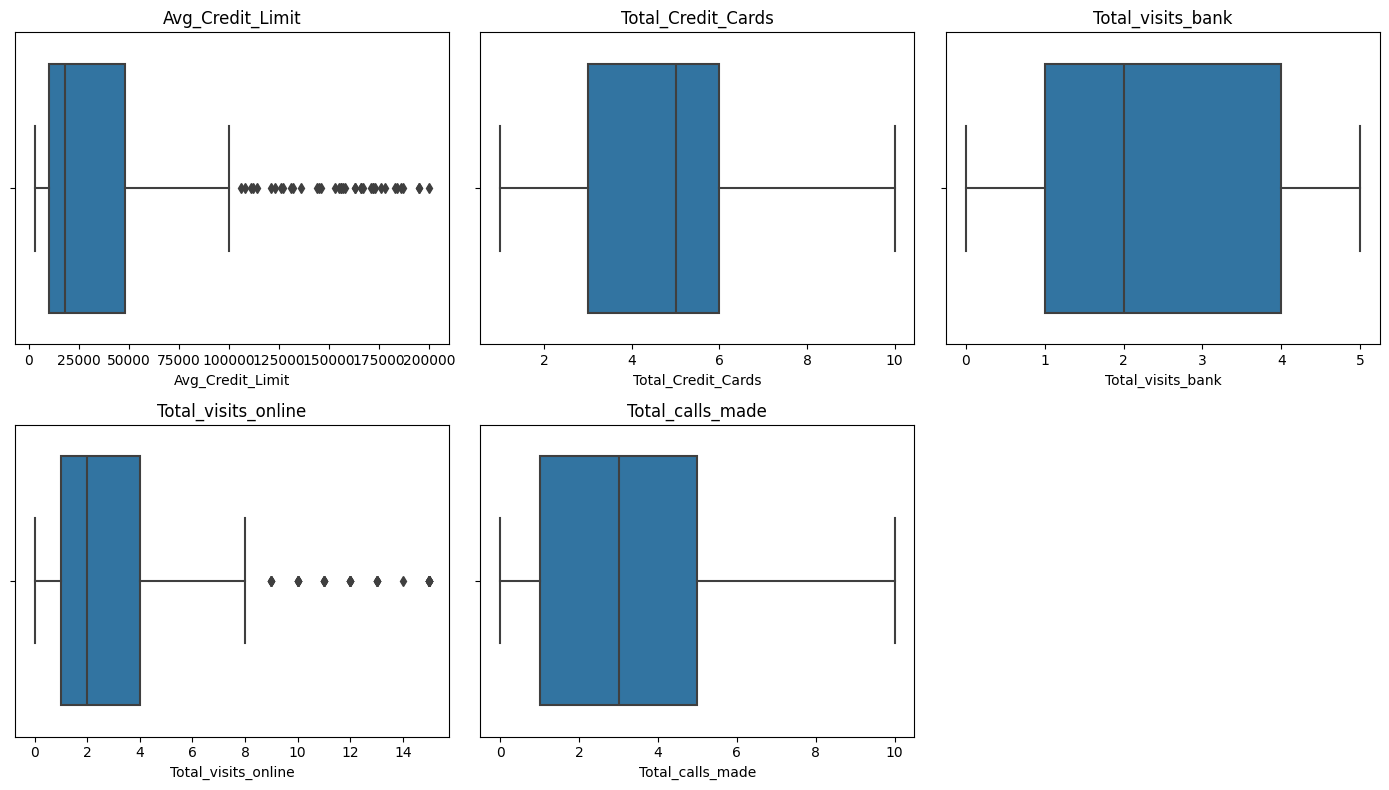

In [92]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# Plot box plots for different columns on different subplots
sns.boxplot(x='Avg_Credit_Limit', data=data, ax=axes[0, 0]) # axes[y,x]
axes[0, 0].set_title('Avg_Credit_Limit')

sns.boxplot(x='Total_Credit_Cards', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Total_Credit_Cards')

sns.boxplot(x='Total_visits_bank', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Total_visits_bank')

sns.boxplot(x='Total_visits_online', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Total_visits_online')

sns.boxplot(x='Total_calls_made', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Total_calls_made')

# Hide the empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

*Insight* from the above we can see that both "Avg_Credit_Limit" and "Total_visits_online" has outliers

In [93]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


*Insight* From the above table we can say that there is a strong positive correlation between "Total Credit Cards" and "Avg Credit Limit", and a strong negative correlation between "Total Calls Made" and "Total Credit Cards".

Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

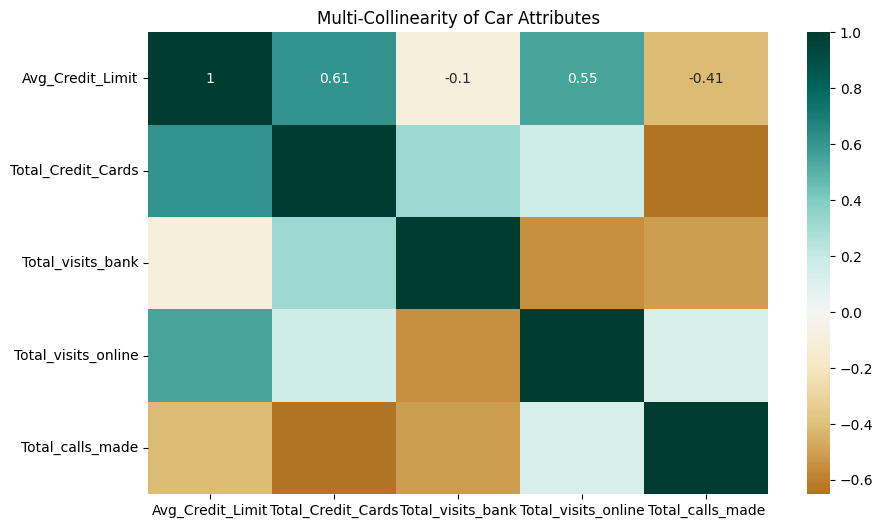

In [94]:
fig, ax = plt.subplots(figsize=(10,6))                       
sns.heatmap(data.corr(),  center=0, cmap='BrBG',annot=True)
ax.set_title('Multi-Collinearity of Car Attributes')

4. Standardize the whole dataset

In [95]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [96]:
data_scaled_df = pd.DataFrame(data=data_scaled, columns=data.columns)

In [97]:
data_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


5. Find the within-cluster sum of square

In [98]:
# Looping over the dataset and fitting it into a k Means cluster and appending the inertia to a list

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [99]:
wcss

[3300.000000000001,
 2040.9898164784945,
 933.0437490000536,
 780.7736895551766,
 704.4759188657507,
 642.2737121575755,
 599.9253971004578,
 567.3277733596053,
 542.2532470747237,
 516.2420460527363]

6. Find silhouette score

In [100]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)


In [101]:
silhouette_scores

[0.41842496663215445,
 0.5157182558881063,
 0.3556670619372605,
 0.2717470361089752,
 0.2560368034254374,
 0.248175083050816,
 0.22712428155198552,
 0.21410594642333988,
 0.2136541425545373]

7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model

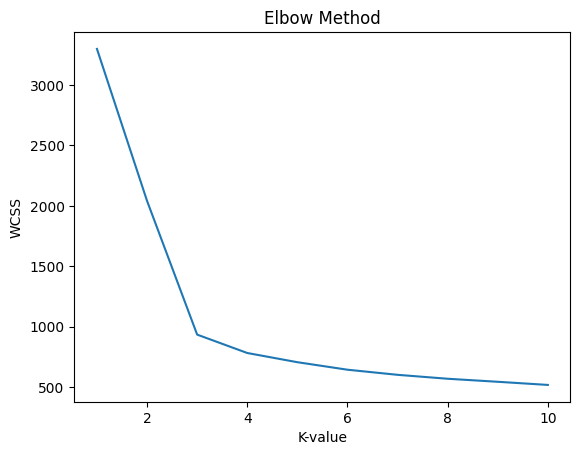

In [102]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('K-value')
plt.ylabel('WCSS')
plt.show()

# plt.plot(range(2, 11), silhouette_scores)
# plt.title('Silhouette Score')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

8. Observe Cluster behavior with different columns

KeyError: 'class'

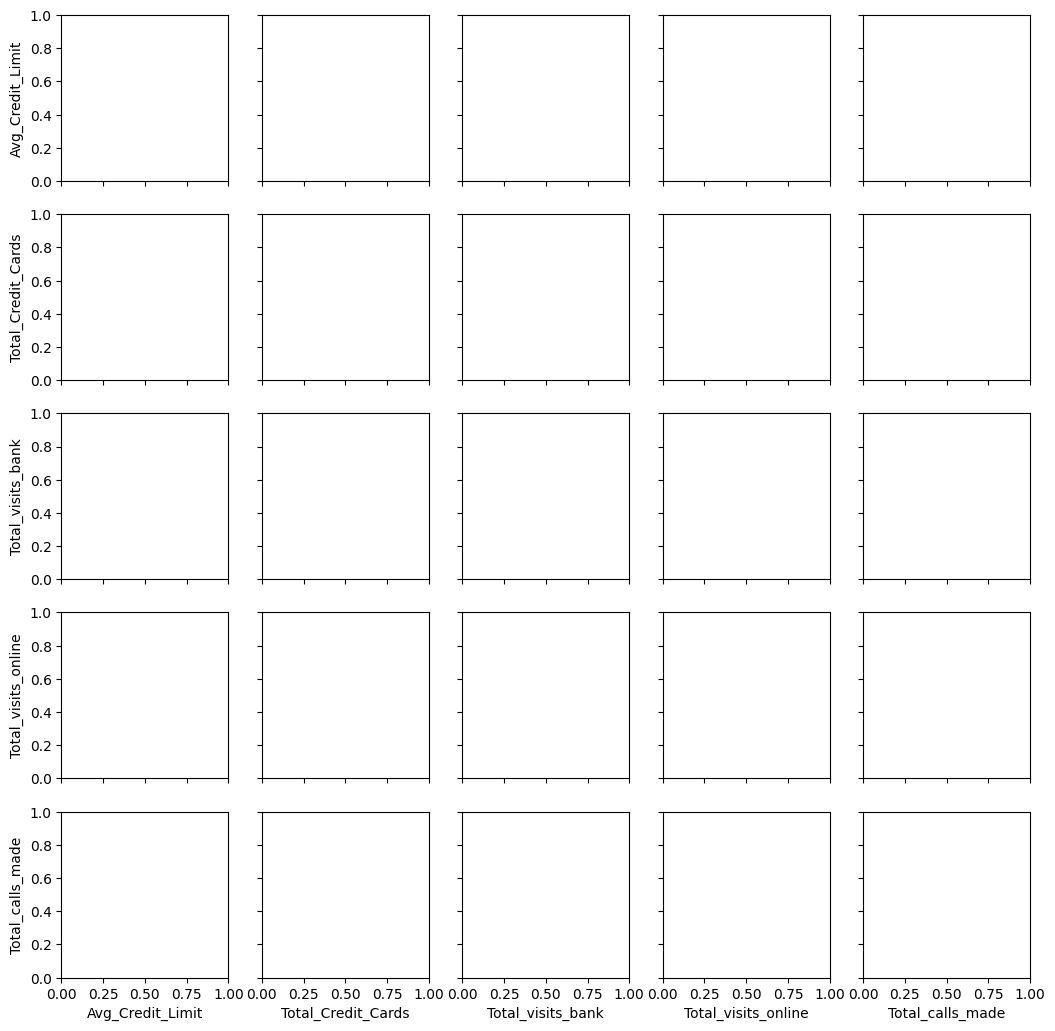

In [120]:
sns.pairplot(data_scaled_df, hue=)
plt.show()

In [104]:
best_k = 3  # Selected based on the elbow method or silhouette score
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans_final.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

9. Print Co-ordinates of all centroids and silhouette scores for the final model

In [105]:
# Task 9: Print centroids and silhouette scores for the final model
print("Coordinates of centroids:")
print(kmeans_final.cluster_centers_)


Coordinates of centroids:
[[-4.13813102e-01 -1.77189220e-03 -1.52157925e-01  6.19296254e-02
  -2.39919610e-01 -6.19944925e-02  2.56670681e-01 -4.45168607e-01
  -3.22189897e-01  1.35955056e+00]
 [ 1.41356446e+00 -4.57614938e-01 -1.87897943e-01 -1.89897212e-01
  -7.07838633e-01  3.98988749e-01 -1.29703104e+00  1.40287396e+00
  -6.12761311e-01  6.88888889e-01]
 [-8.11546508e-01  6.28799110e-01  6.66589781e-01  9.19284201e-02
   1.61229042e+00 -3.76878299e-01  1.07644564e+00 -7.12403707e-01
   1.70451999e+00  3.09090909e+00]]


In [106]:
print("Final Scores")
print("Silhouette Score:", silhouette_score(scaled_df, kmeans_final.labels_))

Final Scores
Silhouette Score: 0.3129124715501844


### Problem Statement 3: DBSCAN Clustering Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:

In [107]:
# Importing Libs

from sklearn.cluster import DBSCAN

In [108]:
mall_customer_df = pd.read_csv("Assignment 5 Datasets\Mall_Customers.csv")

1. Find the correlation among the all the columns and drop the column/s with the least correlation

In [109]:
mall_customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [110]:
correlation_matrix  = mall_customer_df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
correlation_matrix 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [111]:
mall_customer_df.drop(["CustomerID"], axis=1, inplace=True)


# Find the column with the least correlation and drop it
# least_correlated_column = correlation_matrix.min().idxmin()
# mall_customer_df.drop(columns=[least_correlated_column], inplace=True)

*Insight* We can see that *Age* has a negative correlation with the Annual Income, while the *Spending Score* has a positive correlation with the Annual Income meaning that as the annual income increases the spending rate increases as well. We are droping the  customer id colunm 

2. Encode the "Gender" column using get_dummies() function

In [112]:
encoded_mall_df = pd.get_dummies(mall_customer_df, columns=["Gender"])

In [113]:
encoded_mall_df.astype(int)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4 

In [114]:
dbscan = DBSCAN(eps=12.5, min_samples=4)
clusters = dbscan.fit_predict(encoded_mall_df)

In [115]:
clusters

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

4. Print the size of each cluster and also the size of outliers' cluster

In [116]:
unique_clusters, cluster_counts = pd.Series(clusters).value_counts().index, pd.Series(clusters).value_counts()
outliers_count = cluster_counts[-1]


In [117]:
print("Cluster Sizes:")
for cluster, count in zip(unique_clusters[:-1], cluster_counts[:-1]):
    print(f"Cluster {cluster}: {count}")
print(f"Outliers: {outliers_count}")

Cluster Sizes:
Cluster 0: 112
Cluster 2: 34
Cluster 3: 24
Cluster -1: 18
Cluster 1: 8
Outliers: 18


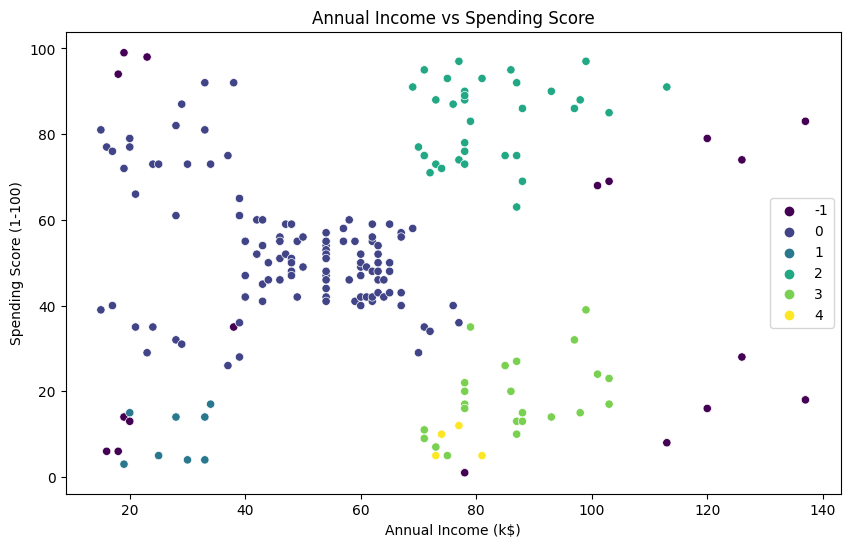

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=encoded_mall_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, palette='viridis', legend='full')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Problem Statement 4: Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame. The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items. Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc.

1. Install mlxtend library for further process

In [121]:
# Install mlxtend library if not already installed
# You can install mlxtend using pip: !pip install mlxtend

In [139]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

2. Load the Groceries data.csv data into a Data frame

In [122]:
grocery_df  = pd.read_csv("Assignment 5 Datasets\Groceries data.csv")

In [128]:
grocery_df.head()

,Member_number,Date,itemDescription,itemCount
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1


3. Print customer data where the member number is 1001

In [123]:
grocery_df[grocery_df["Member_number"] == 1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


4. Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

In [124]:
grocery_df["itemCount"] = 1

5. Drop unnecessary columns like "month","day","year","day_of_week"

In [126]:
grocery_df.drop(columns=['month', 'day', 'year', 'day_of_week'], inplace=True)

6. Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.

In [143]:
grouped_df = grocery_df.groupby(['Member_number', 'itemDescription']).sum()

In [147]:
# After grouping and summing, we unstack the innermost level of the index (i.e., the 'items' column). 
# This converts the index level containing the items into columns, 
# effectively creating a wide format DataFrame where each item becomes a column.

grouped_df= grouped_df.unstack().fillna(0)[['itemCount']]
grouped_df

itemCount                            \
itemDescription Instant food products UHT-milk abrasive cleaner   
Member_number                                                     
1000                              0.0      0.0              0.0   
1001                              0.0      0.0              0.0   
1002                              0.0      0.0              0.0   
1003                              0.0      0.0              0.0   
1004                              0.0      0.0              0.0   
...                               ...      ...              ...   
4996                              0.0      0.0              0.0   
4997                              0.0      0.0              0.0   
4998                              0.0      0.0              0.0   
4999                              0.0      0.0              0.0   
5000                              0.0      0.0              0.0   

                                                                    \
itemDescription artif. sweetener baby cosmetics bags baking powder   
Member_number                                                        
1000                         0.0            0.0  0.0           0.0   
1001                         0.0            0.0  0.0           0.0   
1002                         0.0            0.0  0.0           0.0   
1003                         0.0            0.0  0.0           0.0   
1004                         0.0            0.0  0.0           0.0   
...                          ...            ...  ...           ...   
4996                         0.0            0.0  0.0           0.0   
4997                         0.0            0.0  0.0           0.0   
4998                         0.0            0.0  0.0           0.0   
4999                         0.0            0.0  0.0           0.0   
5000                         0.0            0.0  0.0           0.0   

                                               ...                         \
itemDescription bathroom cleaner beef berries  ... turkey vinegar waffles   
Member_number                                  ...                          
1000                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
1001                         0.0  1.0     0.0  ...    0.0     0.0     0.0   
1002                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
1003                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
1004                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
...                          ...  ...     ...  ...    ...     ...     ...   
4996                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
4997                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
4998                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
4999                         0.0  0.0     2.0  ...    0.0     0.0     0.0   
5000                         0.0  0.0     0.0  ...    0.0     0.0     0.0   

                                                                             \
itemDescription whipped/sour cream whisky white bread white wine whole milk   
Member_number                                                                 
1000                           0.0    0.0         0.0        0.0        2.0   
1001                           1.0    0.0         1.0        0.0        2.0   
1002                           0.0    0.0         0.0        0.0        1.0   
1003                           0.0    0.0         0.0        0.0        0.0   
1004                           0.0    0.0         0.0        0.0        3.0   
...                            ...    ...         ...        ...        ...   
4996                           0.0    0.0         0.0        0.0        0.0   
4997                           0.0    0.0         0.0        1.0        1.0   
4998                           0.0    0.0         0.0        0.0        0.0   
4999                           1.0    0.0         0.0        0.0        0.0   
50

7. Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%

In [149]:
# frequent_itemsets = apriori(grouped_df, min_support=0.07, use_colnames=True)

8. Generating the rules with their corresponding support, confidence, and lift

In [ ]:
# Generate rules with their corresponding support, confidence, and lift
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

9. Filtering out the values with lift > = 1 and confidence > = 0.5